In [ ]:
# pip install tensorflow keras matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(
    #'./chest_xray/train',
    '/content/drive/MyDrive/Udemy_Healthcare_Course_Demo/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 1069s 7s/step - accuracy: 0.7967 - loss: 1.0963
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 399ms/step - accuracy: 0.9670 - loss: 0.0863
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 402ms/step - accuracy: 0.9800 - loss: 0.0556
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 396ms/step - accuracy: 0.9803 - loss: 0.0460
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 387ms/step - accuracy: 0.9891 - loss: 0.0275


In [ ]:
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Udemy_Healthcare_Course_Demo/chest_xray/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.evaluate(validation_generator)


Found 16 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9375 - loss: 0.0888


[0.08878399431705475, 0.9375]

In [ ]:
val_score=model.evaluate(validation_generator)
print(val_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9375 - loss: 0.0888
[0.08878398686647415, 0.9375]


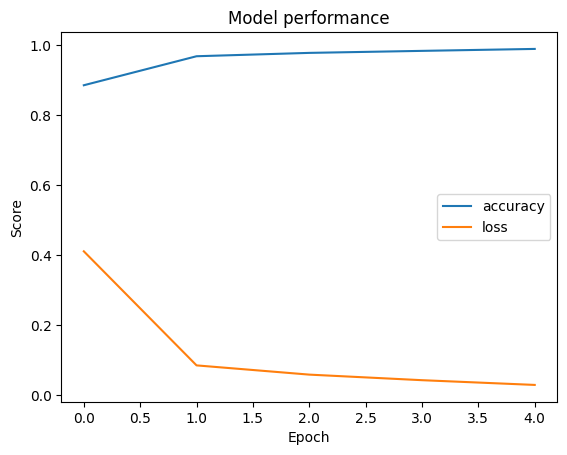

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('Model performance')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
acc

[0.8857361674308777,
 0.9685583114624023,
 0.9781441688537598,
 0.9838957190513611,
 0.98945552110672]

In [ ]:
test_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/Udemy_Healthcare_Course_Demo/chest_xray/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
)
model.evaluate(test_generator)

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 286s 14s/step - accuracy: 0.7454 - loss: 1.4137


[1.3869991302490234, 0.7564102411270142]

In [ ]:
test_scores = model.evaluate(test_generator)
print(test_scores)

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 348ms/step - accuracy: 0.7652 - loss: 1.3244
[1.3869991302490234, 0.7564102411270142]


In [ ]:
count=0
for image_batch, label_batch in validation_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.654902   0.654902   0.654902  ]
  [0.         0.         0.        ]
  [1.         1.         1.        ]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.02745098 0.02745098 0.02745098]
  [0.05490196 0.05490196 0.05490196]]

 [[0.00784314 0.00784314 0.00784314]
  [0.         0.         0.        ]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.02352941 0.02352941 0.02352941]
  [0.06666667 0.06666667 0.06666667]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.         0.         0.        ]
  [0.02745098 0.02745098 0.02745098]
  [0.0627451  0.0627451  0.0627451 ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00784314 0.00784314 0.00784314]
  [0.         0.         0.        ]


Run prediction on a sample image

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
for image_batch, labels_batch in test_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['NORMAL', 'PNEUMONIA']


first image to predict
actual label: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
predicted label: NORMAL


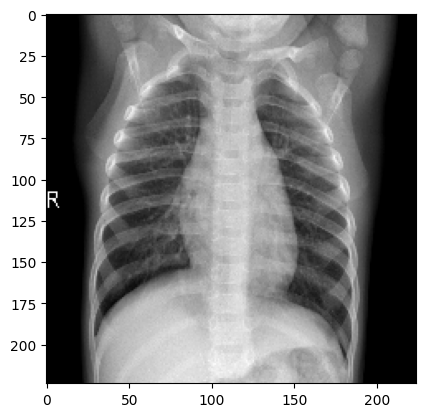

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


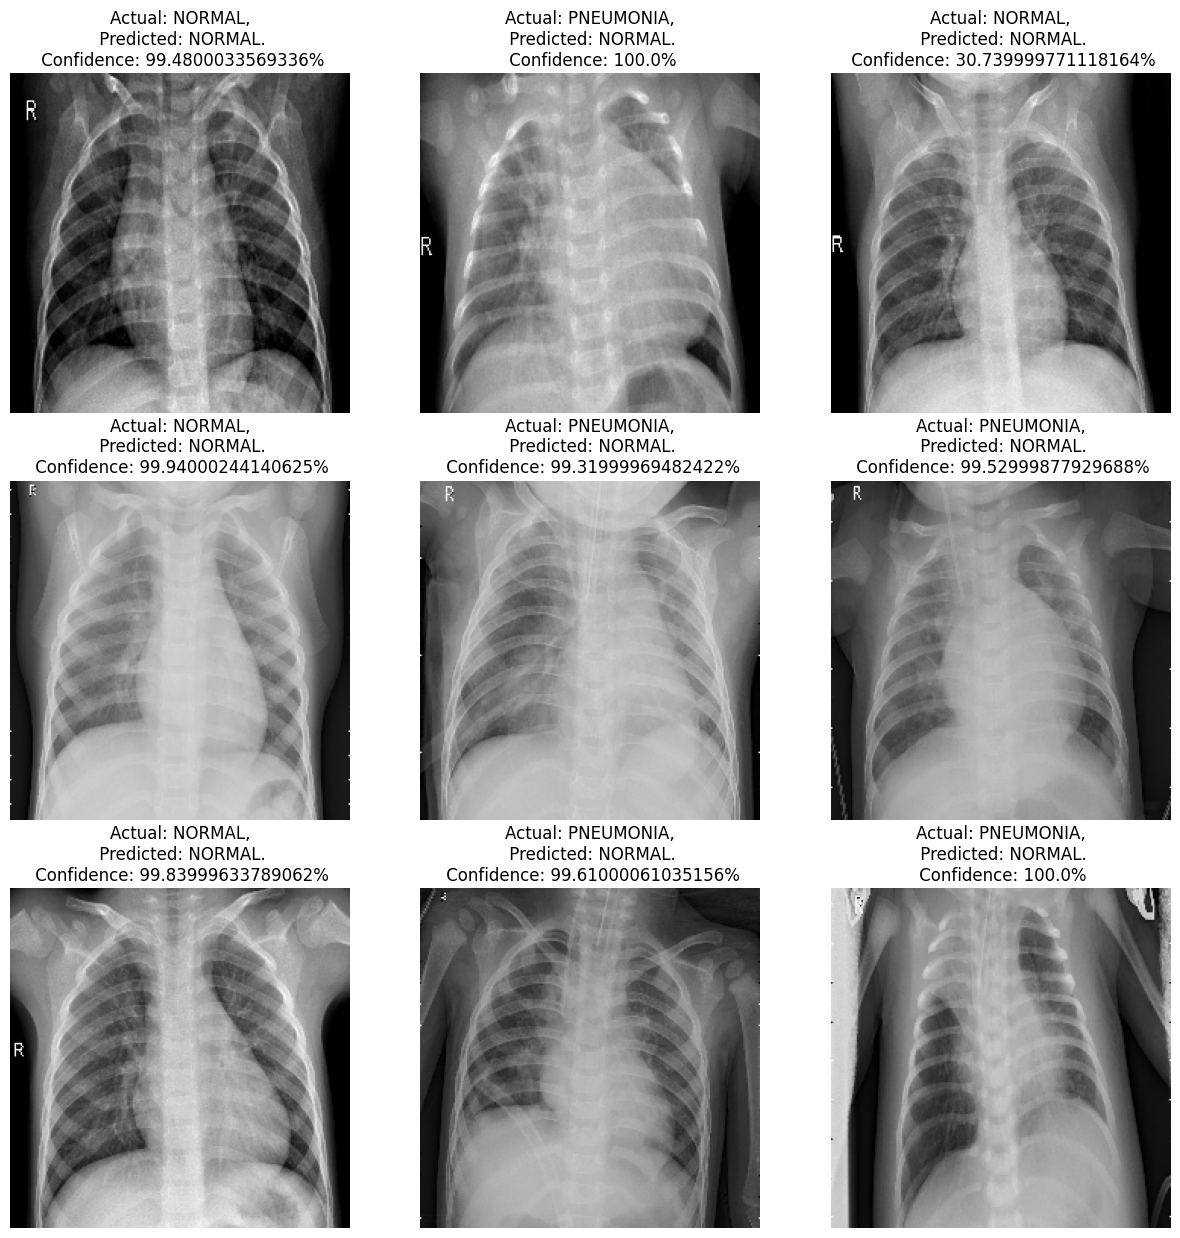

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break